In [19]:
from IPython.display import display, Math, Latex

# Libraries you might need
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import scipy.stats as stat

### Homework 3

**1.** Let $X \sim Poisson(\lambda)$.

**(a)**
Plot in Python the probability mass function (p.m.f.) of X for λ = 1; 5; 10; 50. What do you observe
about the shape of the p.m.f. as λ grows?
*(1 point)*

**(b)**
What are the parameters of the best matching Normal distribution for
a given Poisson distribution with parameter λ? No formal derivation is required here, use your intuition and verify by plotting (for the same values of
λ as above).
(1 point)

**(a) Answer:**
The shape of the Poisson distribution approaches the shape of the normal distribution.

**(b) Answer:**
If $\lambda$ is the mean and the standard variation of the Poisson distribution, the best matching normal distribution will have a mean of $\lambda$ and a standard deviation $\sqrt{\lambda}$.

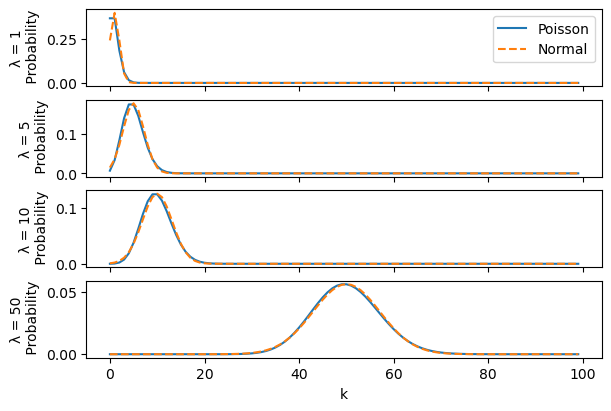

In [3]:
k = np.arange(0, 100, 1)
lambdas = [1, 5, 10, 50]

_, axs = plt.subplots(ncols = 1, nrows = len(lambdas), figsize = (6, len(lambdas)), sharex = True, constrained_layout = True)

for l, ax in zip(lambdas, axs):
    poisson = stat.poisson.pmf(k, mu = l, loc = 0)
    normal = stat.norm.pdf(k, loc = l, scale = np.sqrt(l)) # loc = mean, scale = standard deviation
    ax.plot(k, poisson, label = "Poisson")
    ax.plot(k, normal, label = "Normal", linestyle = "dashed")
    ax.set_ylabel(f"λ = {l}\n Probability")

    if l == 1:
        ax.legend(loc = "upper right")

plt.xlabel("k")
plt.show()

**2. Noise models**

Assume a tuning curve $f(s)$ with stimulus $s \in [-5, 5]$:
$$f(s) = f_\max * \frac1{1 + e^{-s}}$$
In each subtask the firing rate $r$ is given by a different noise model. For a discretized interval (50 bins) for $s$ into, draw 10 samples from $p(r|f(s))$. Do this for different $f_{max} = 1; 10; 100$, and plot the rates, their mean $\pm$ sem (standard error of the mean), and the analytical function.
(1.5 points for each subtask)

**(a)** Additive normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=1$.

**(b)** Multiplicative normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=f(s)$.

**(c)** Poisson noise
$$p(r|f(s)=\frac{f(s)^r}{r!} e^{-f(s)}$$

**(d)** Negative Binomial
$$p(r|q,p)= {{r+q-1}\choose{r}} (1-p)^q p^r$$
with $p=\frac{f(s)}{f(s)+q}$, $q=f(s)$.
Be careful about the case when $p = 0$.

**(e)** Based on your results, briefly discuss how realistic each of these models is. (1 point)

In [74]:
def f(s, fmax):
    return fmax * (1 / (1 + np.exp(-s)))

In [75]:
s_min = -5
s_max = 5
n_bins = 50
n_samples = 10
f_maxs = [ 1, 10, 100 ]

stimulus = np.linspace(s_min, s_max, n_bins + 1)

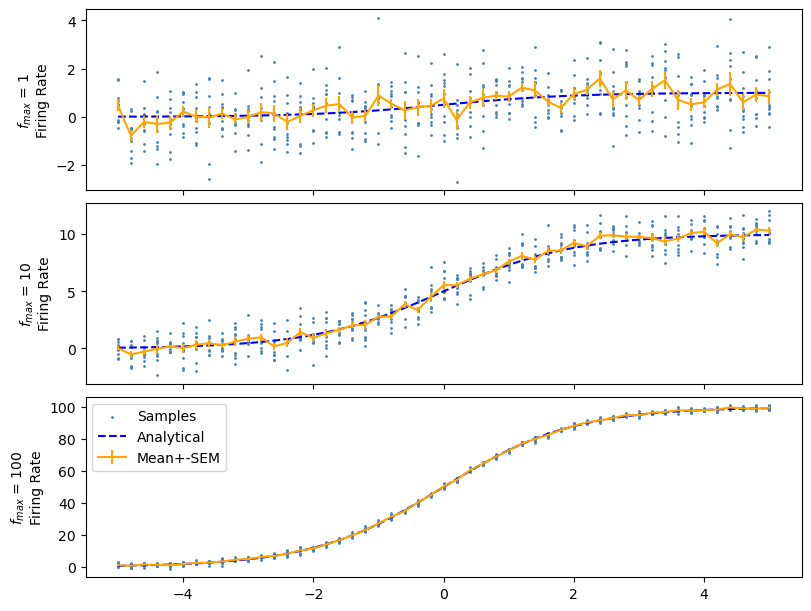

In [94]:
# Normal additive
np.random.seed(42)

fig, axs = plt.subplots(ncols = 1, nrows = len(f_maxs), figsize = (8, len(f_maxs) * 2), sharex = True, constrained_layout = True)

for f_max, ax in zip(f_maxs, axs):
    means = []
    sems = []
    analytical = []
    
    for s in stimulus:
        sigma = 1
        mean = f(s, f_max)
        points = stat.norm.rvs(loc = mean, scale = sigma, size = n_samples) # loc = mean, scale = standard deviation

        if s == s_min:
            ax.scatter(np.repeat(s, n_samples), points, s = 1, label = "Samples", c = "steelblue")
        else:
            ax.scatter(np.repeat(s, n_samples), points, s = 1, c = "steelblue")

        means.append(np.mean(points))
        sems.append(stat.sem(points))
        analytical.append(mean)

    ax.plot(stimulus, analytical, linestyle = "--", color = "blue", label = "Analytical")
    ax.errorbar(stimulus, means, sems, label = "Mean+-SEM", color = "orange")
    
    ax.set_ylabel("$f_{max}$ = " + f"{f_max}" + "\n" + "Firing Rate")

plt.legend()
plt.show()

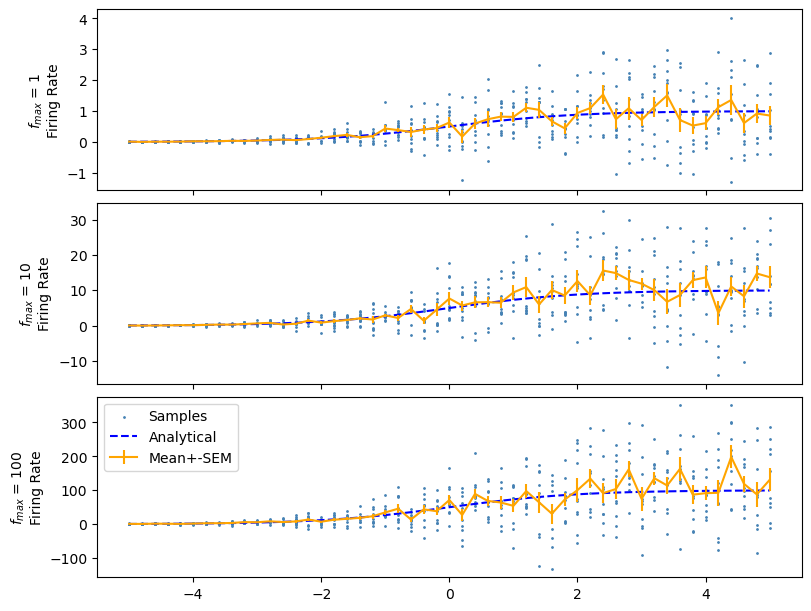

In [96]:
# Normal multiplicative
np.random.seed(42)

fig, axs = plt.subplots(ncols = 1, nrows = len(f_maxs), figsize = (8, len(f_maxs) * 2), sharex = True, constrained_layout = True)

for f_max, ax in zip(f_maxs, axs):
    means = []
    sems = []
    analytical = []

    for s in stimulus:
        sigma = f(s, f_max)
        mean = f(s, f_max)
        points = stat.norm.rvs(loc = mean, scale = sigma, size = n_samples) # loc = mean, scale = standard deviation

        if s == s_min:
            ax.scatter(np.repeat(s, n_samples), points, s = 1, label = "Samples", c = "steelblue")
        else:
            ax.scatter(np.repeat(s, n_samples), points, s = 1, c = "steelblue")

        means.append(np.mean(points))
        sems.append(stat.sem(points))
        analytical.append(mean)

    ax.plot(stimulus, analytical, linestyle = "--", color = "blue", label = "Analytical")
    ax.errorbar(stimulus, means, sems, label = "Mean+-SEM", color = "orange")

    ax.set_ylabel("$f_{max}$ = " + f"{f_max}" + "\n" + "Firing Rate")

plt.legend()
plt.show()

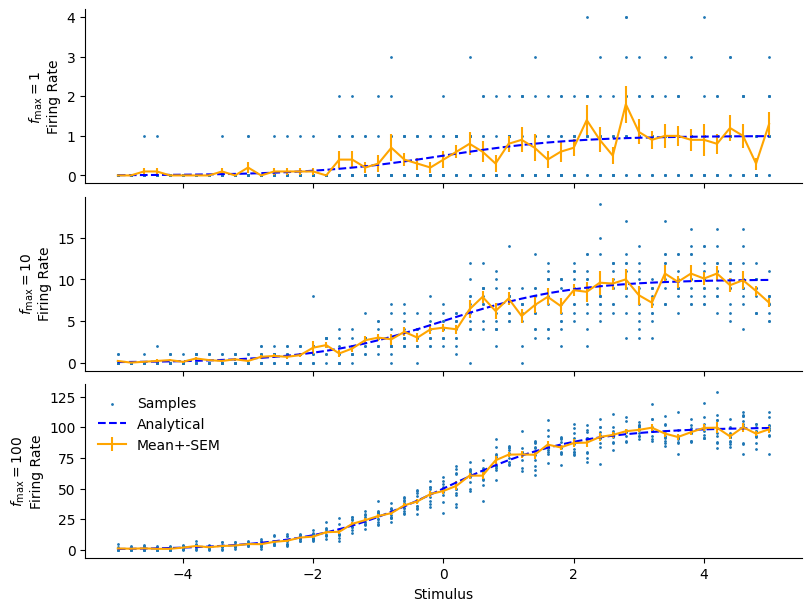

In [ ]:
# Poisson


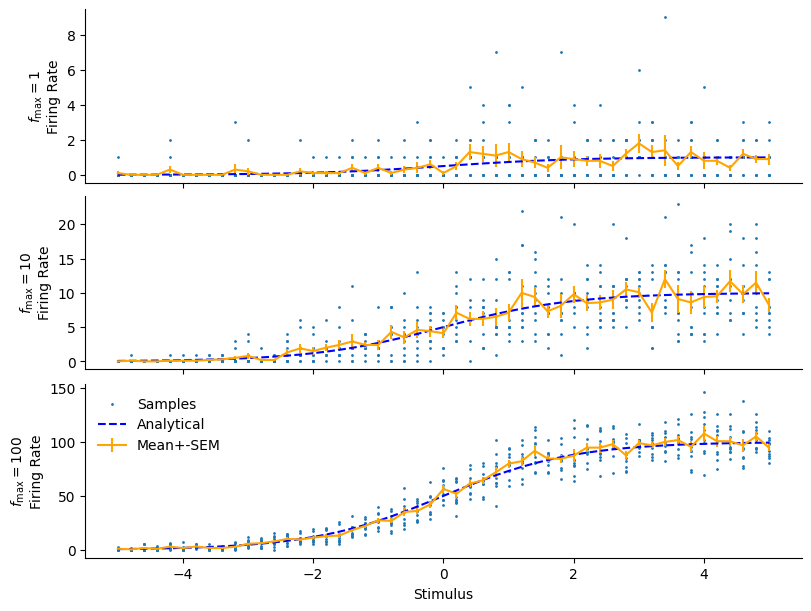

In [ ]:
# Negative Binomial


**Answer e)**

TODO


**3. Bernoulli Neuron: Fisher information and estimator**

Assume a Bernoulli neuron with arbitrary tuning curve $f(s)$, i.e.
$$p(r| f(s)) = f(s)^r(1- f(s))^{1-r}, \qquad r \in \{0; 1\}$$

*Note: $r$ is discrete and $s$ is continuous.*

**(a)** Compute the Fisher information $J_s$. *(2 points)*

**(b)** Assume $f(s) = \frac{1}{1+s^2}$. Plot the Fisher information on the interval $s\in[-5, 5]$. *(2 points)*

**(c)** Given an estimator
$\hat s(r) = \begin{cases} 1 & if\qquad r=0\\ 0 &if\qquad r=1\end{cases}$.\
Compute variance $\sigma^2(s)$, bias $b(s)$, and mean squared error $MS(s)$ of this estimator. Don't use the relationship $MS(s) = b^2(s) + \sigma^2(s)$, but instead compute them independently. *(2 points)*

*Confirm for yourself with an automatized tool like wolphramalpha that their relationship is correct.*

**(d)** Assume $s\sim\mathcal{U}([0,1])$. Compute the ideal observer $\hat s_{MS}(r)$. *(2 points)*

*Hint: Compute $p(r=0)$ and $p(r=1)$ with law of total probability. Then use Bayes' theorem to compute $p(s|r)$. Useful integrals:*
\begin{split}
\int \frac1{1+s^2} ds &= \tan^{-1}(s) + c, \qquad c\in\mathbb{R}\\
\int \frac{s}{1+s^2} ds &= \frac12 \ln(1+s^2) + c, \qquad c\in\mathbb{R} \\
\int \frac{s^2}{1+s^2} ds &= s - \tan^{-1}(s) + c, \qquad c\in\mathbb{R} \\
\int \frac{s^3}{1+s^2} ds &= \frac{s^2 - \ln(1+s^2)}{2} + c, \qquad c\in\mathbb{R}
\end{split}

**(e*)** Contextualize the previous exercises with Cramer-Rao bound. *(up to 3 bonus points depending on the depth of the answer: 1 - rough context, 2 - correct context, 3 - going above and beyond)*


**(a) Answer**

TODO

**(b) Answer**

TODO

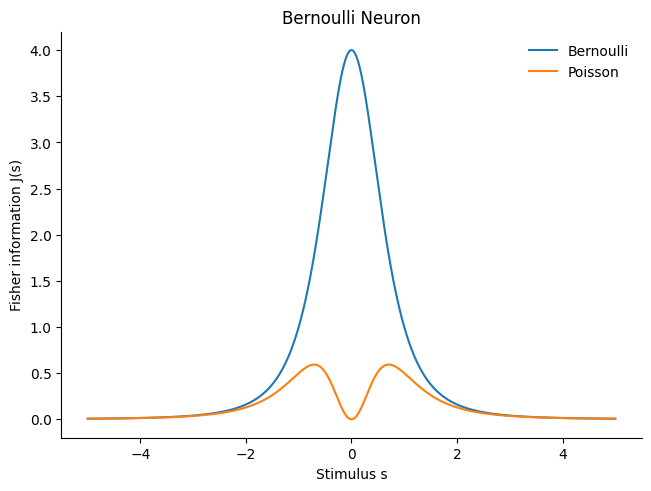

In [ ]:
def f(s):
    return # TODO

def df(s):
    return # TODO

# TODO

**(c) Answer**

Bias of the estimator
\begin{equation*}
\begin{split}
b(s) &= E\left[\hat{s} | s\right] - s \\
&= p(r=0)\cdot \hat{s}(r=0) + p(r=1)\cdot \hat{s}(r=1) - s \\
&= ...
\end{split}
\end{equation*}

Variance of the estimator
\begin{equation*}
\begin{split}
\sigma^2(s) &= E\left[(E[\hat{s}|s] - \hat{s}(r))^2\right] \\
&= ...
\end{split}
\end{equation*}

Mean squared error
\begin{equation*}
\begin{split}
MS(s) &= E\left[(s-\hat{s}(r))^2\right] \\
&= ...
\end{split}
\end{equation*}

**(d) Answer**

\begin{split}
p(r=1) &= \int_0^1 p(r=1|s) \cdot p(s) ds\\
&= ...\\
p(r=0) &= ...
\end{split}

Ideal observer
\begin{split}
\hat{s}_{MS}(r) &= ... \\
\hat{s}_{MS}(r=1) &= ...\\
&\approx 0.44 \\
\hat{s}_{MS}(r=0) &= ...\\
&\approx 0.71
\end{split}

In [ ]:
# Simulation for checking my numbers in (d)(not required)
n_samples = 100_000
s = np.random.random(size=(n_samples))
r = np.random.binomial(n=1, p=f(s))
print("p(r=1)", np.mean(r==1))
print("p(r=0)", np.mean(r==0))

print("<s|r=1>", np.mean(s[r==1]))
print("<s|r=0>", np.mean(s[r==0]))

p(r=1) 0.78566
p(r=0) 0.21434
<s|r=1> 0.44178663811078944
<s|r=0> 0.7153706881452142


**(e) Answer**
TODO